In [28]:
%matplotlib inline

In [67]:
#Global imports
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import datetime
#project imports
import utils
import start
import kernel as ker

In [14]:
# store data

xfile = open('../data/Xtr.csv')
xtsv = csv.reader(xfile)
countline=0
Xtr = []
N = 5000
for row in xtsv:
    countline+=1
    if countline>N:
        break
    Xtr.append(np.array(map(float,row[:-1])))
Xtr = np.array(Xtr)

In [6]:
Ytr = np.genfromtxt('../data/Ytr.csv', delimiter=',',skip_header=True)[:,1]

In [7]:
print Xtr.shape, Ytr.shape

(5000, 3072) (5000,)


In [32]:
print(Xtr[0])

[ 0.00701831  0.00032327  0.00221461 ...,  0.00522321 -0.0008604
 -0.01288091]


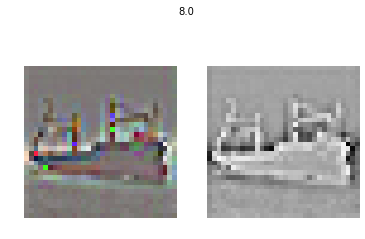

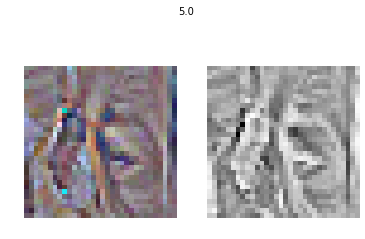

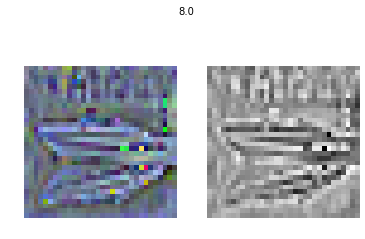

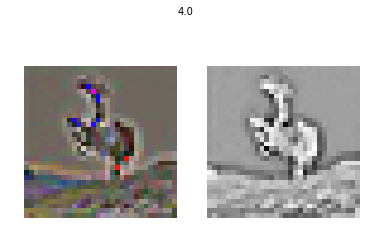

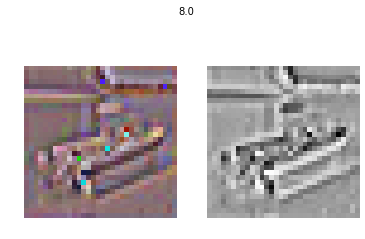

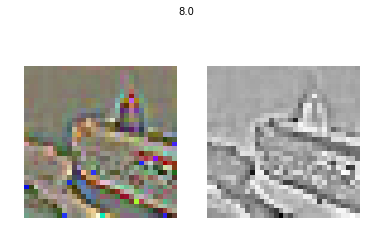

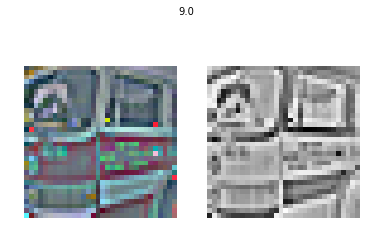

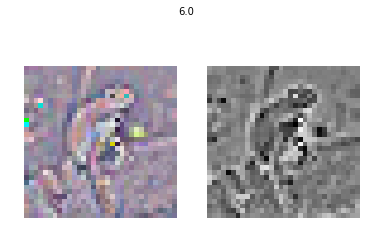

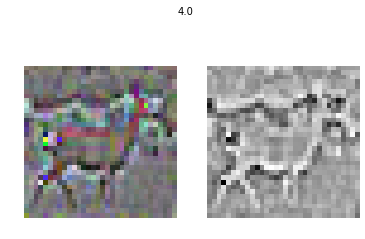

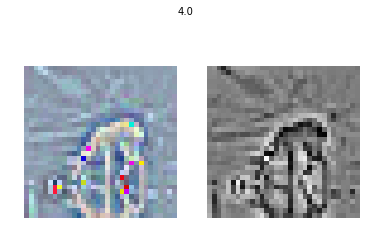

In [8]:
for j in range(10):
    index = j*10
    rgbimage = utils.get_rgb_array(Xtr[index])
    grayimage = utils.get_gray_image(rgbimage)
    plt.figure()
    plt.subplot(121)
    plt.imshow(rgbimage,interpolation='nearest')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(grayimage,cmap='Greys',interpolation='nearest')
    plt.axis('off')
    plt.suptitle(Ytr[index])

(array([ 500.,  500.,  500.,  500.,  500.,  500.,  500.,  500.,  500.,  500.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

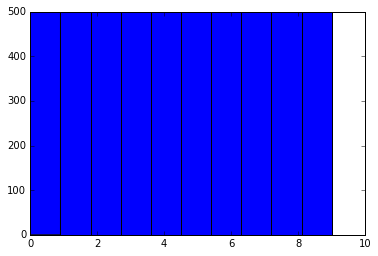

In [26]:
plt.hist(Ytr)

On a 500 images de 10 classes différentes. 

In [13]:
N_train = 3000
train_images = Xtr[:N_train,:]
train_labels = Ytr[:N_train]
test_images = Xtr[N_train:,:]
test_labels = Ytr[N_train:]

In [15]:
#Compute the features. Caution it is very slow.
t1 = datetime.now()
train_features = ker.first_scattering_kernel(train_images)
test_features = ker.first_scattering_kernel(test_images)
t2 = datetime.now()
print("computed features. duration:",t2-t1)

In [18]:
print train_features.shape, test_features.shape

(3000, 6336) (2000, 6336)


In [40]:
def sort_by_cat(training_set,train_labels): 
    import pandas as pd
    data = pd.DataFrame(data=training_set,dtype=float)
    data['label'] = train_labels
    data.sort_values('label',inplace=True)
    sorted_set = np.array(data.iloc[:,:-1])
    return sorted_set

In [41]:
train_features = sort_by_cat(train_features,train_labels)

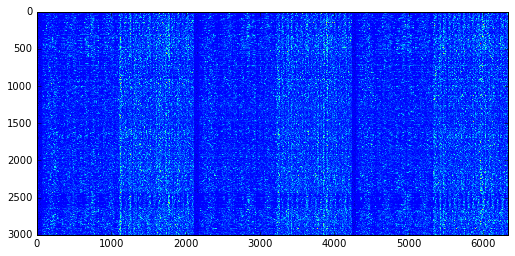

In [42]:
plt.figure(figsize=(10,4))
plt.imshow(train_features,interpolation='nearest')
pass

In [43]:
distmat = ker.distance_matrix(train_features,train_features)

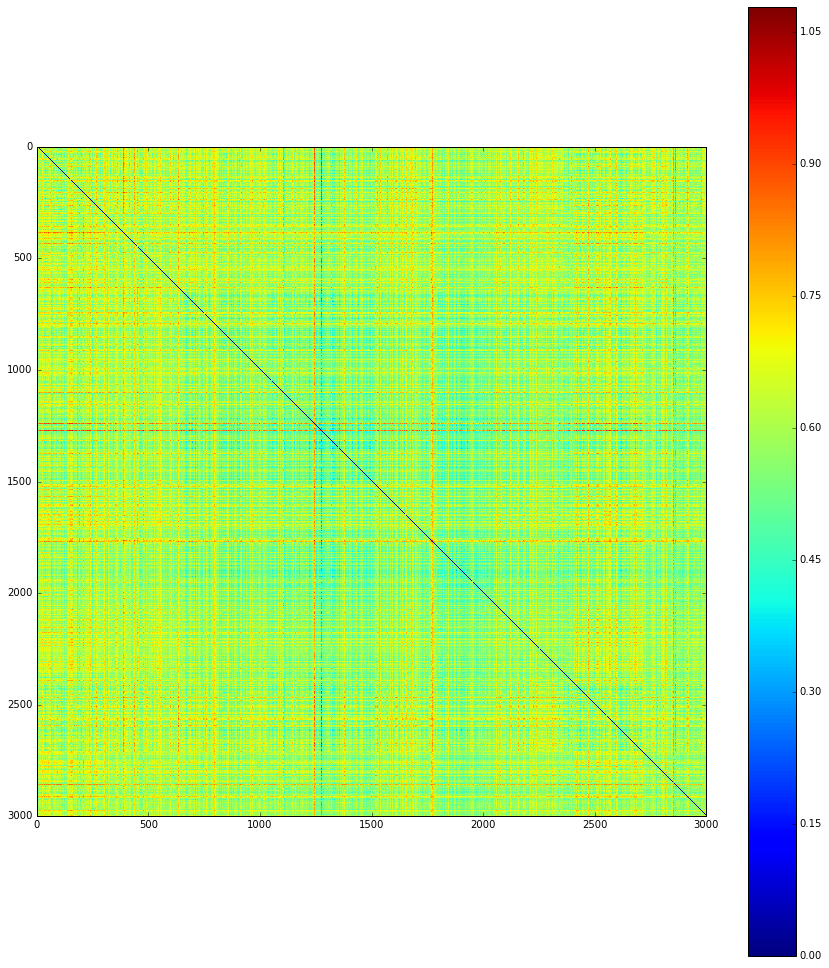

In [50]:
plt.figure(figsize=(15,17))
plt.imshow(distmat,interpolation='nearest')
plt.colorbar()

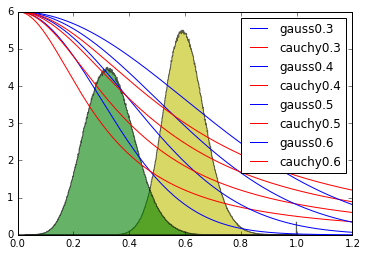

In [62]:
plt.figure()
plt.hist(distmat.ravel(),bins=1000,normed=True,color='y',alpha=.6,histtype='stepfilled')
plt.hist(ker.gaussian(distmat.ravel(),.4),bins=1000,normed=True,color='g',alpha=.6,histtype='stepfilled')
x = np.linspace(0,1.2,1000)
for sigma in [.3,.4,.5,.6]:
    plt.plot(x,6*ker.gaussian(x,sigma),label='gauss'+str(sigma),c='b')
    plt.plot(x,6*ker.cauchy(x,sigma),label='cauchy'+str(sigma),c='r')
plt.legend(loc='best')
pass

For the Gaussian and Cauchy kernel, take sigma=0.4

In [99]:
reload(start)
import classification as clf
reload(classification)
import kernel
reload(kernel)

<module 'kernel' from 'kernel.py'>

In [79]:
start.predict_with_SVM(train_features, train_labels, test_features, test_labels, lambdas=[0.00003],
                 filename='../data/Y_te_scattering_lambda_3_10-5.csv',
                 Kernel=lambda x,y:ker.gaussian_kernel(x,y,.4))

(3000, 3000)
     pcost       dcost       gap    pres   dres
 0: -1.3186e+03 -3.7115e+04  6e+04  3e-01  2e-14
 1: -1.2332e+03 -6.8788e+03  6e+03  8e-14  3e-14
 2: -1.3825e+03 -2.7781e+03  1e+03  5e-15  2e-14
 3: -1.4849e+03 -1.8785e+03  4e+02  2e-14  2e-14
 4: -1.5219e+03 -1.6062e+03  8e+01  1e-13  3e-14
 5: -1.5326e+03 -1.5459e+03  1e+01  1e-13  3e-14
 6: -1.5349e+03 -1.5359e+03  1e+00  1e-14  3e-14
 7: -1.5351e+03 -1.5352e+03  4e-02  2e-14  3e-14
 8: -1.5351e+03 -1.5351e+03  1e-03  4e-14  3e-14
Optimal solution found.
classifier for label  0  done
(3000, 3000)
     pcost       dcost       gap    pres   dres
 0: -1.3056e+03 -3.9132e+04  7e+04  3e-01  3e-14
 1: -1.2062e+03 -7.4796e+03  6e+03  1e-13  4e-14
 2: -1.3749e+03 -2.9076e+03  2e+03  2e-13  3e-14
 3: -1.4852e+03 -1.8856e+03  4e+02  2e-13  4e-14
 4: -1.5263e+03 -1.6199e+03  9e+01  2e-13  4e-14
 5: -1.5389e+03 -1.5528e+03  1e+01  1e-13  4e-14
 6: -1.5416e+03 -1.5427e+03  1e+00  3e-14  4e-14
 7: -1.5419e+03 -1.5419e+03  5e-02  5e-1

ValueError: could not broadcast input array from shape (2000) into shape (6336)

In [100]:
_lambda=3e-5    
t1 = datetime.now()
alphas, bias = clf.one_versus_all_SVM(train_features, train_labels, _lambda=_lambda,Kernel=ker.get_kernel('linear',.4))
t2 = datetime.now()
print 'model fitted. duration: ', t2 - t1

     pcost       dcost       gap    pres   dres
 0: -3.0291e+03 -4.5839e+04  8e+04  4e-01  3e-14
 1: -2.8005e+03 -1.0812e+04  8e+03  9e-14  2e-14
 2: -2.9230e+03 -5.4611e+03  3e+03  5e-14  2e-14
 3: -3.0612e+03 -4.2732e+03  1e+03  3e-14  2e-14
 4: -3.1553e+03 -3.5147e+03  4e+02  2e-14  2e-14
 5: -3.1998e+03 -3.3538e+03  2e+02  5e-14  2e-14
 6: -3.2203e+03 -3.2606e+03  4e+01  7e-14  2e-14
 7: -3.2282e+03 -3.2360e+03  8e+00  2e-13  2e-14
 8: -3.2302e+03 -3.2310e+03  9e-01  6e-14  3e-14
 9: -3.2304e+03 -3.2305e+03  5e-02  8e-14  2e-14
10: -3.2304e+03 -3.2304e+03  1e-03  3e-14  3e-14
Optimal solution found.
classifier for label  0  done
     pcost       dcost       gap    pres   dres
 0: -3.0287e+03 -4.5924e+04  8e+04  4e-01  3e-14
 1: -2.8002e+03 -1.0832e+04  8e+03  3e-13  4e-14
 2: -2.9391e+03 -5.0760e+03  2e+03  4e-14  3e-14
 3: -3.1069e+03 -3.9969e+03  9e+02  2e-13  4e-14
 4: -3.1851e+03 -3.4978e+03  3e+02  3e-13  4e-14
 5: -3.2251e+03 -3.3241e+03  1e+02  2e-13  4e-14
 6: -3.2413e+03 -

In [101]:
t2 = datetime.now()
prediction = clf.predict_SVM(alphas, bias, train_features, test_features,Kernel=ker.get_kernel('linear',.4))
t3 = datetime.now()
print 'prediction done. duration: ', t3 - t2

prediction done. duration:  0:00:18.719220


In [102]:
well_classified = (prediction == test_labels).sum()
print 'lambda = ', _lambda, ' rate = ', float(well_classified) / len(prediction)

lambda =  3e-05  rate =  0.0885


In [ ]:
start.predict_with_SVM(train_features, train_labels, test_features, test_labels, lambdas=[0.00003],
                 filename='../data/Y_te_scattering_lambda_3_10-5.csv')